In [1]:
from evaldata_utils import parse_model_path, load_data
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
metrics = [
    "mmlu/acc",
    "mmlu_pro/exact_match,custom-extract",
    "copa/acc",
    "lambada_openai/acc",
    "openbookqa/acc",
    "openbookqa/acc_norm",
    "winogrande/acc",
    "arc_challenge/acc_norm",
    "arc_challenge/acc",
    "arc_easy/acc_norm",
    "arc_easy/acc",
    "boolq/acc",
    "commonsense_qa/acc",
    "hellaswag/acc_norm",
    "piqa/acc_norm",
    "piqa/acc",
    "social_iqa/acc",
]


In [3]:
benchmarks = ['copa', 'lambada_openai', 'openbookqa', 'winogrande', 'social_iqa',
       'mmlu', 'mmlu_pro', 'arc_challenge', 'arc_easy', 'boolq',
       'commonsense_qa', 'hellaswag', 'piqa']

In [4]:
bench_sel = ['mmlu', 'copa', 'lambada_openai', 'openbookqa', 'winogrande', 'arc_challenge', 'boolq', 'commonsense_qa', 'hellaswag', 'piqa']

In [5]:
df_all = pd.read_csv("results.csv.zip")

In [6]:
df_all["n_iter"] = df_all.model_path.apply(lambda x: int(x.split("_")[-1]))

In [7]:
print(df_all.columns)
print(f"Number of models: {len(df_all.model_name.unique())}, numbers of checkpoints: {len(df_all.model_path.unique())}")

Index(['model_name', 'model_path', 'benchmark', 'metric',
       'total_evaluation_time_seconds', 'value', 'num_layers', 'hidden_size',
       'ffn_hidden_size', 'num_attention_heads', 'seq_length',
       'max_position_embeddings', 'global_batch_size', 'train_iters',
       'lr_decay_style', 'lr_warmup_iters', 'lr_decay_iters', 'lr', 'min_lr',
       'model_size', 'original_log_dir_name', 'dataset', 'tokenizer', 'size',
       'n_tokens', 'n_iter'],
      dtype='object')
Number of models: 72, numbers of checkpoints: 1947


In [8]:
df_all.pivot_table(index="model_name", columns="benchmark", aggfunc="count")["lr"]

benchmark,arc_challenge,arc_easy,boolq,commonsense_qa,copa,hellaswag,lambada_openai,mmlu,mmlu_pro,openbookqa,piqa,social_iqa,winogrande
model_name,,,,,,,,,,,,,
open-sci-ref_model-0.13b_data-Nemotron-cc-2024-HQ-real-synth-mix_tokenizer-GPT-NeoX_samples-300B_global_bs-1008_context-4096_schedule-WSD_lr-4e-3_warmup-25000_machine-LEONARDO,74.0,74.0,37.0,37.0,37.0,37.0,37.0,37.0,NaN,74.0,74.0,37.0,37.0
open-sci-ref_model-0.4b_data-CommonCorpus_tokenizer-GPT-NeoX_samples-300B_global_bs-1000_context-4096_schedule-WSD_lr-4e-3_warmup-25000_machine-LEONARDO_14408846,74.0,24.0,12.0,37.0,37.0,12.0,37.0,24.0,NaN,74.0,74.0,37.0,37.0
open-sci-ref_model-0.4b_data-DCLM_tokenizer-GPT-NeoX-2_samples-300B_global_bs-1000_context-4096_schedule-WSD_lr-4e-3_warmup-25000_machine-LEONARDO_14270775,70.0,24.0,12.0,35.0,35.0,12.0,35.0,23.0,NaN,70.0,70.0,35.0,35.0
open-sci-ref_model-0.4b_data-DCLM_tokenizer-GPT-NeoX_samples-300B_global_bs-1000_context-4096_schedule-WSD_lr-6e-3_warmup-25000_machine-LEONARDO_14296685,56.0,24.0,12.0,28.0,28.0,12.0,28.0,23.0,NaN,56.0,56.0,28.0,28.0
open-sci-ref_model-0.4b_data-HPLT-2.0_tokenizer-GPT-NeoX_samples-300B_global_bs-1000_context-4096_schedule-WSD_lr-4e-3_warmup-25000_machine-LEONARDO_14405802,70.0,20.0,10.0,35.0,35.0,10.0,35.0,NaN,NaN,70.0,70.0,35.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
open-sci-refmodel-1.7bdata-FineWeb-Edu-1.4Ttokenizer-GPT-NeoXsamples-1000Bglobalbs-1008context-4096schedule-WSDlr-4e-3warmup-25000machine-LEONARDO,96.0,96.0,48.0,48.0,94.0,48.0,94.0,94.0,11.0,188.0,96.0,94.0,94.0
open-sci-refmodel-1.7bdata-FineWeb-Edu-1.4Ttokenizer-GPT-NeoXsamples-300Bglobalbs-1008context-4096schedule-WSDlr-4e-3warmup-25000machine-LEONARDO,74.0,74.0,37.0,37.0,37.0,37.0,37.0,37.0,11.0,74.0,74.0,37.0,37.0
open-sci-refmodel-1.7bdata-HPLT-2.0tokenizer-GPT-NeoXsamples-300Bglobalbs-1008context-4096schedule-WSDlr-4e-3warmup-25000machine-LEONARDO,74.0,74.0,37.0,37.0,37.0,37.0,37.0,37.0,11.0,74.0,74.0,37.0,37.0


In [55]:
# count for number of tasks available for each checkpoint
df_task_model_count = df_all.pivot_table(index="benchmark", columns="model_path", aggfunc="count", fill_value=0)["lr"].loc[bench_sel].T
df_task_model_count[df_task_model_count>1] = 1
series_model_count = df_task_model_count.sum(axis=1)
series_model_count.value_counts()

10    1662
6      134
5       88
9       25
7       19
8       11
4        4
2        2
3        1
Name: count, dtype: int64

In [56]:
# show checkpoints with not all evaluations available

In [62]:
series_model_count[series_model_count<10].head()

model_path
/leonardo_work/EUHPC_E03_068/tcarsten/converted_checkpoints/open-sci-ref_model-0.4b_data-FineWeb-Edu-1.4T_tokenizer-GPT-NeoX_samples-300B_global_bs-1000_context-4096_schedule-WSD_lr-4e-3_warmup-25000_machine-LEONARDO_14405800/hf/iter_0056000    9
/leonardo_work/EUHPC_E03_068/tcarsten/converted_checkpoints/open-sci-ref_model-0.4b_data-HPLT-2.0_tokenizer-GPT-NeoX_samples-300B_global_bs-1000_context-4096_schedule-WSD_lr-4e-3_warmup-25000_machine-LEONARDO_14405802/hf/iter_0024000            9
/leonardo_work/EUHPC_E03_068/tcarsten/converted_checkpoints/open-sci-ref_model-0.4b_data-HPLT-2.0_tokenizer-GPT-NeoX_samples-300B_global_bs-1000_context-4096_schedule-WSD_lr-4e-3_warmup-25000_machine-LEONARDO_14405802/hf/iter_0026000            9
/leonardo_work/EUHPC_E03_068/tcarsten/converted_checkpoints/open-sci-ref_model-0.4b_data-HPLT-2.0_tokenizer-GPT-NeoX_samples-300B_global_bs-1000_context-4096_schedule-WSD_lr-4e-3_warmup-25000_machine-LEONARDO_14405802/hf/iter_0028000            9
/

In [70]:
pd.Series(missing_checkpoint_tasks.values()).value_counts()

[copa, lambada_openai, openbookqa, winogrande]                                               134
[arc_challenge, boolq, commonsense_qa, hellaswag, piqa]                                       88
[mmlu]                                                                                        25
[mmlu, boolq, hellaswag]                                                                      19
[boolq, hellaswag]                                                                            11
[mmlu, arc_challenge, boolq, commonsense_qa, hellaswag, piqa]                                  4
[mmlu, copa, lambada_openai, openbookqa, winogrande, arc_challenge, commonsense_qa, piqa]      2
[copa, lambada_openai, openbookqa, winogrande, arc_challenge, commonsense_qa, piqa]            1
Name: count, dtype: int64

In [67]:
missing_checkpoint_tasks = {}
for model, row in df_task_model_count.T.items():
    missing_tasks = [benchmark for benchmark, count in row.to_dict().items() if count == 0]
    if len(missing_tasks) > 0:
        missing_checkpoint_tasks[model] = missing_tasks        

In [69]:
sum(len(x) for x in missing_checkpoint_tasks.values())

1127

In [85]:
tasks_ = ["arc_challenge", "boolq", "commonsense_qa", "hellaswag", "piqa"]
checkpoints_missing_zeroshot = [k for k, v in missing_checkpoint_tasks.items() if all(x in str(v) for x in tasks_)]
with open("../../llmeval/llmeval/models-zeroshot-leonardo-10-shots.txt", "w") as f:
    f.write("\n".join(checkpoints_missing_zeroshot))
len(checkpoints_missing_zeroshot)

92

In [79]:
!open .

In [66]:
#print("\n".join(checkpoints_missing_mmlu))

In [15]:
len(missing_checkpoint_tasks)

285

In [16]:
print("number of checkpoint/tasks combination missing")
sum(len(x) for x in missing_checkpoint_tasks.values())

number of checkpoint/tasks combination missing


1137

In [88]:
df_task_model_count.loc[series_model_count.sort_values().index].head()

benchmark,mmlu,copa,lambada_openai,openbookqa,winogrande,arc_challenge,boolq,commonsense_qa,hellaswag,piqa
model_path,,,,,,,,,,
/leonardo_work/EUHPC_E03_068/tcarsten/converted_checkpoints/open-sci-ref_model-1.3b_data-HPLT-2.0_tokenizer-GPT-NeoX_samples-300B_global_bs-1008_context-4096_schedule-WSD_lr-4e-3_warmup-25000_machine-LEONARDO_13686118/hf/iter_0048000,0,0,0,0,0,0,1,0,1,0
/leonardo_work/EUHPC_E03_068/tcarsten/converted_checkpoints/open-sci-ref_model-1.3b_data-HPLT-2.0_tokenizer-GPT-NeoX_samples-300B_global_bs-1008_context-4096_schedule-WSD_lr-4e-3_warmup-25000_machine-LEONARDO_13686118/hf/iter_0052000,0,0,0,0,0,0,1,0,1,0
/leonardo_work/EUHPC_E03_068/tcarsten/converted_checkpoints/open-sci-ref_model-1.3b_data-HPLT-2.0_tokenizer-GPT-NeoX_samples-300B_global_bs-1008_context-4096_schedule-WSD_lr-4e-3_warmup-25000_machine-LEONARDO_13686118/hf/iter_0034000,1,0,0,0,0,0,1,0,1,0
/leonardo_work/EUHPC_E03_068/tcarsten/converted_checkpoints/open-sci-ref_model-0.4b_data-Nemotron-cc-2024-HQ-real-synth-mix_tokenizer-GPT-NeoX_samples-300B_global_bs-1000_context-4096_schedule-WSD_lr-4e-3_warmup-25000_machine-LEONARDO_14456644/hf/iter_0060000,0,1,1,1,1,0,0,0,0,0
/leonardo_work/EUHPC_E03_068/tcarsten/converted_checkpoints/open-sci-ref_model-0.4b_data-Nemotron-cc-2024-HQ-real-synth-mix_tokenizer-GPT-NeoX_samples-300B_global_bs-1000_context-4096_schedule-WSD_lr-4e-3_warmup-25000_machine-LEONARDO_14456644/hf/iter_0006000,0,1,1,1,1,0,0,0,0,0


In [89]:
series_model_count.sort_values().head()

model_path
/leonardo_work/EUHPC_E03_068/tcarsten/converted_checkpoints/open-sci-ref_model-1.3b_data-HPLT-2.0_tokenizer-GPT-NeoX_samples-300B_global_bs-1008_context-4096_schedule-WSD_lr-4e-3_warmup-25000_machine-LEONARDO_13686118/hf/iter_0048000                              2
/leonardo_work/EUHPC_E03_068/tcarsten/converted_checkpoints/open-sci-ref_model-1.3b_data-HPLT-2.0_tokenizer-GPT-NeoX_samples-300B_global_bs-1008_context-4096_schedule-WSD_lr-4e-3_warmup-25000_machine-LEONARDO_13686118/hf/iter_0052000                              2
/leonardo_work/EUHPC_E03_068/tcarsten/converted_checkpoints/open-sci-ref_model-1.3b_data-HPLT-2.0_tokenizer-GPT-NeoX_samples-300B_global_bs-1008_context-4096_schedule-WSD_lr-4e-3_warmup-25000_machine-LEONARDO_13686118/hf/iter_0034000                              3
/leonardo_work/EUHPC_E03_068/tcarsten/converted_checkpoints/open-sci-ref_model-0.4b_data-Nemotron-cc-2024-HQ-real-synth-mix_tokenizer-GPT-NeoX_samples-300B_global_bs-1000_context-4096_schedule-W

In [90]:
# missing_checkpoint_tasks

## Scores analysis

In [20]:
df_scores = df_all.pivot_table(index="model_path", columns="benchmark", aggfunc="max")["value"].loc[:, bench_sel]

In [91]:
df_scores.dropna().mean(axis=1).sort_values(ascending=False).head()

model_path
/leonardo_work/EUHPC_E03_068/tcarsten/converted_checkpoints/open-sci-ref_model-1.7b_data-Nemotron-cc-2024-HQ-real-synth-mix_tokenizer-GPT-NeoX_samples-1000B_global_bs-252_context-16384_rotary-1000000_schedule-WSD_lr-4e-3_warmup-25000_machine-LEONARDO_14904513/hf/iter_0240000   0.64
/leonardo_work/EUHPC_E03_068/tcarsten/converted_checkpoints/open-sci-ref_model-1.7b_data-Nemotron-cc-2024-HQ-real-synth-mix_tokenizer-GPT-NeoX_samples-1000B_global_bs-252_context-16384_rotary-1000000_schedule-WSD_lr-4e-3_warmup-25000_machine-LEONARDO_14904513/hf/iter_0242204   0.64
/leonardo_work/EUHPC_E03_068/tcarsten/converted_checkpoints/open-sci-ref_model-1.7b_data-Nemotron-cc-2024-HQ-real-synth-mix_tokenizer-GPT-NeoX_samples-1000B_global_bs-252_context-16384_rotary-1000000_schedule-WSD_lr-4e-3_warmup-25000_machine-LEONARDO_14904513/hf/iter_0242000   0.64
/leonardo_work/EUHPC_E03_068/tcarsten/converted_checkpoints/open-sci-ref_model-1.7b_data-Nemotron-cc-2024-HQ-real-synth-mix_tokenizer-GPT-Ne

In [92]:
# add columns for compatibility with previous schema
#df_all["n_tokens"] = df_all["n_tokens"]

In [93]:
model_name = "open-sci-ref_model-1.7b_data-C4_tokenizer-GPT-NeoX_samples-300B_global_bs-2048_context-2048_schedule-WSD_lr-4e-3_warmup-30000_machine-LEONARDO_11580700"
df_all[df_all.model_path.str.contains(model_name)].pivot_table(
    index="n_iter", 
    columns="n_tokens", 
    values="value",
).head()

n_tokens,300B
n_iter,
2000,0.38
4000,0.42
6000,0.42
8000,0.44
10000,0.46


In [94]:
df_all.columns

Index(['model_name', 'model_path', 'benchmark', 'metric',
       'total_evaluation_time_seconds', 'value', 'num_layers', 'hidden_size',
       'ffn_hidden_size', 'num_attention_heads', 'seq_length',
       'max_position_embeddings', 'global_batch_size', 'train_iters',
       'lr_decay_style', 'lr_warmup_iters', 'lr_decay_iters', 'lr', 'min_lr',
       'model_size', 'original_log_dir_name', 'dataset', 'tokenizer', 'size',
       'n_tokens', 'n_iter'],
      dtype='object')

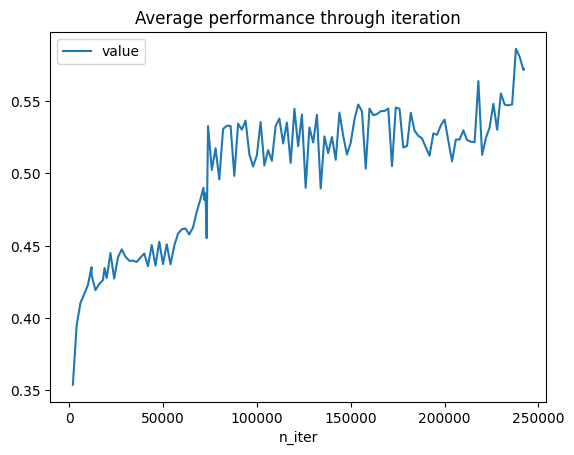

In [95]:
df_mean = df_all.loc[:, ["model_path", "n_iter", "value"]].groupby(["model_path", "n_iter"]).mean().reset_index()
df_mean = df_mean.sort_values(by=["model_path", "n_iter"])
ax = df_mean.loc[:, ["n_iter", "value"]].groupby("n_iter").mean().plot()
ax.set_title("Average performance through iteration");

Text(0, 0.5, 'Average performance')

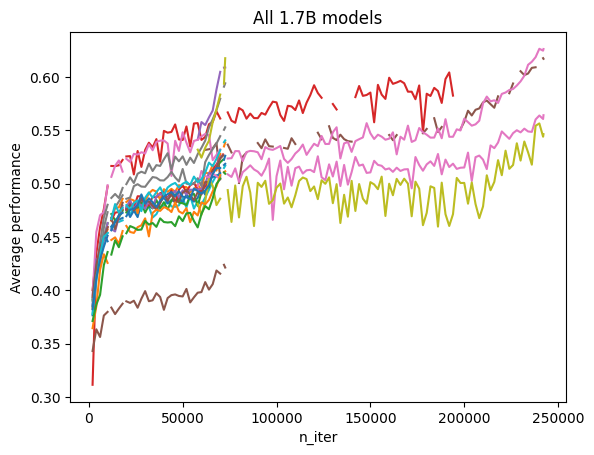

In [96]:
bench_sel_curve = [
    #'mmlu',
 'copa',
 'lambada_openai',
 'openbookqa',
 'winogrande',
 'arc_challenge',
 'boolq',
 'commonsense_qa',
 'hellaswag',
 'piqa']


df_all.loc[(df_all.benchmark.isin(bench_sel_curve)) & (df_all.loc[:, "size"] == 1.7)].pivot_table(index="n_iter", columns="model_name", values="value").plot(legend=False)
plt.title("All 1.7B models")
plt.ylabel("Average performance")

Text(0, 0.5, 'Average performance')

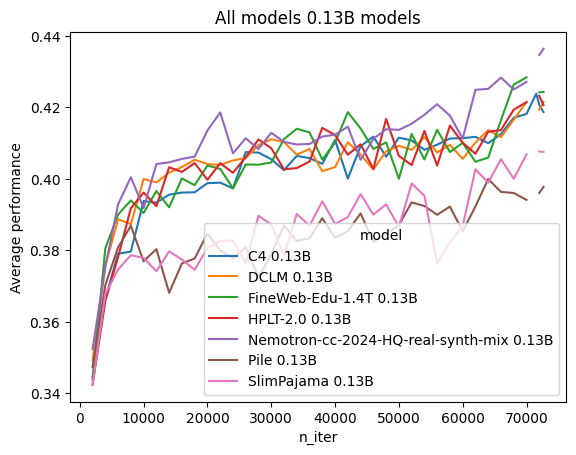

In [97]:
df_plot = df_all.copy()
df_plot["model"] = df_plot.apply(lambda row: f'{row["dataset"]} {row["size"]}B', axis=1)
df_plot.loc[(df_plot.benchmark.isin(bench_sel_curve)) & (df_plot.loc[:, "size"] == 0.13)].pivot_table(index="n_iter", columns="model", values="value").plot(legend=True)
plt.title("All models 0.13B models")
plt.ylabel("Average performance")

In [98]:
df_all.columns

Index(['model_name', 'model_path', 'benchmark', 'metric',
       'total_evaluation_time_seconds', 'value', 'num_layers', 'hidden_size',
       'ffn_hidden_size', 'num_attention_heads', 'seq_length',
       'max_position_embeddings', 'global_batch_size', 'train_iters',
       'lr_decay_style', 'lr_warmup_iters', 'lr_decay_iters', 'lr', 'min_lr',
       'model_size', 'original_log_dir_name', 'dataset', 'tokenizer', 'size',
       'n_tokens', 'n_iter'],
      dtype='object')

## Hyperparameter analysis

In [99]:
hp_cols = [
 'size',
 'dataset',
 'tokenizer',
 'n_tokens',
 'global_batch_size',
 'seq_length',
 'lr_decay_style',
 'lr',
 'lr_warmup_iters']

In [100]:
df_all.groupby(["size", "dataset", "tokenizer", "n_tokens", "global_batch_size", "seq_length", "lr_decay_style", "lr", "lr_warmup_iters"]).count()

model_name  \
size dataset                            tokenizer    n_tokens global_batch_size seq_length lr_decay_style lr   lr_warmup_iters               
0.13 C4                                 gpt-neox-20b 300B     1,008.00          4,096.00   WSD            0.01 25,000.00               623   
                                                              1,024.00          4,096.00   WSD            0.00 25,000.00               657   
     DCLM                               gpt-neox-20b 300B     1,008.00          4,096.00   WSD            0.00 25,000.00               623   
                                                                                                          0.01 25,000.00               673   
     FineWeb-Edu-1.4T                   gpt-neox-20b 300B     1,008.00          4,096.00   WSD            0.00 25,000.00               673   
     HPLT-2.0                           gpt-neox-20b 300B     1,008.00          4,096.00   WSD            0.00 25,000.00               633   
     Nemotron-cc-2024-HQ-real-synth-mix gpt-neox-20b 300B     1,008.00          4,096.00   WSD            0.00 25,000.00               592   
     Pile                               gpt-neox-20b 300B     1,008.00          4,096.00   WSD            0.00 25,000.00               623   
     SlimPajama                         gpt-neox-20b 300B     1,008.00          4,096.00   WSD            0.00 25,000.00               669   
0.40 C4                                 gpt-neox-20b 300B     1,000.00          4,096.00   WSD            0.01 25,000.00               845   
     CommonCorpus                       gpt-neox-20b 300B     1,000.00          4,096.00   WSD            0.00 25,000.00              1071   
     DCLM                               gpt-neox-20b 300B     1,000.00          4,096.00   WSD            0.00 25,000.00              1339   
                                                                                                          0.01 25,000.00               827   
     FineWeb-Edu-1.4T                   gpt-neox-20b 300B     1,000.00          4,096.00   WSD            0.00 25,000.00               591   
     HPLT-2.0                           gpt-neox-20b 300B     1,000.00          4,096.00   WSD            0.00 25,000.00              1126   
     Nemotron-cc-2024-HQ-real-synth-mix gpt-neox-20b 300B     1,000.00          4,096.00   WSD            0.00 25,000.00               433   
     Pile                               gpt-neox-20b 300B     1,000.00          4,096.00   WSD            0.00 25,000.00               975   
     SlimPajama                         gpt-neox-20b 300B     1,000.00          4,096.00   WSD            0.00 25,000.00               935   
1.30 CommonCorpus                       gpt-neox-20b 300B     1,008.00          4,096.00   WSD            0.00 25,000.00              1184   
     DCLM                               gpt-neox-20b 300B     1,008.00          4,096.00   WSD            0.00 25,000.00              1184   
     FineWeb-Edu-1.4T                   gpt-neox-20b 300B     1,008.00          4,096.00   WSD            0.00 25,000.00              1184   
     HPLT-2.0                           gpt-neox-20b 300B     1,008.00          4,096.00   WSD            0.00 25,000.00              1094   
     Nemotron-cc-2024-HQ-real-synth-mix gpt-neox-20b 300B     1,008.00          4,096.00   WSD            0.00 25,000.00               592   
     Pile                               gpt-neox-20b 300B     1,008.00          4,096.00   WSD            0.00 25,000.00              1184   
     SlimPajama                         gpt-neox-20b 300B     1,008.00          4,096.00   WSD            0.00 25,000.00              1184   
1.70 C4                                 gpt-neox-20b 300B     1,008.00          4,096.00   WSD            0.00 10,000.00               612   
                                                                                                               20,000.00               647   
          

In [101]:
df_all.drop_duplicates(hp_cols).loc[:, hp_cols].sort_values(by=["size", "dataset"]).reset_index(drop=True)

,size,dataset,tokenizer,n_tokens,global_batch_size,seq_length,lr_decay_style,lr,lr_warmup_iters
0,0.13,C4,gpt-neox-20b,300B,"1,024.00","4,096.00",WSD,0.00,"25,000.00"
1,0.13,C4,gpt-neox-20b,300B,"1,008.00","4,096.00",WSD,0.01,"25,000.00"
2,0.13,DCLM,gpt-neox-20b,300B,"1,008.00","4,096.00",WSD,0.01,"25,000.00"
3,0.13,DCLM,gpt-neox-20b,300B,"1,008.00","4,096.00",WSD,0.00,"25,000.00"
4,0.13,FineWeb-Edu-1.4T,gpt-neox-20b,300B,"1,008.00","4,096.00",WSD,0.00,"25,000.00"
5,0.13,HPLT-2.0,gpt-neox-20b,300B,"1,008.00","4,096.00",WSD,0.00,"25,000.00"
6,0.13,Nemotron-cc-2024-HQ-real-synth-mix,gpt-neox-20b,300B,"1,008.00","4,096.00",WSD,0.00,"25,000.00"
7,0.13,Pile,gpt-neox-20b,300B,"1,008.00","4,096.00",WSD,0.00,"25,000.00"
8,0.13,SlimPajama,gpt-neox-20b,300B,"1,008.00","4,096.00",WSD,0.00,"25,000.00"
9,0.40,C4,gpt-neox-20b,300B,"1,000.00","4,096.00",WSD,0.01,"25,000.00"


In [102]:
df_all.loc[:, hp_cols].groupby(hp_cols).count()

Empty DataFrame
Columns: []
Index: [(0.13, C4, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.006, 25000.0), (0.13, C4, gpt-neox-20b, 300B, 1024.0, 4096.0, WSD, 0.004, 25000.0), (0.13, DCLM, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (0.13, DCLM, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.006, 25000.0), (0.13, FineWeb-Edu-1.4T, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (0.13, HPLT-2.0, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (0.13, Nemotron-cc-2024-HQ-real-synth-mix, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (0.13, Pile, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (0.13, SlimPajama, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (0.4, C4, gpt-neox-20b, 300B, 1000.0, 4096.0, WSD, 0.006, 25000.0), (0.4, CommonCorpus, gpt-neox-20b, 300B, 1000.0, 4096.0, WSD, 0.004, 25000.0), (0.4, DCLM, gpt-neox-20b, 300B, 1000.0, 4096.0, WSD, 0.004, 25000.0), (0.4, DCLM, gpt-neox-20b, 300B, 1000.0, 4096.0, WSD, 0.006, 25000.0), (0.4, FineWeb-Edu-1.4T, gpt-neox-20b, 300B, 1000.0, 4096.0, WSD, 0.004, 25000.0), (0.4, HPLT-2.0, gpt-neox-20b, 300B, 1000.0, 4096.0, WSD, 0.004, 25000.0), (0.4, Nemotron-cc-2024-HQ-real-synth-mix, gpt-neox-20b, 300B, 1000.0, 4096.0, WSD, 0.004, 25000.0), (0.4, Pile, gpt-neox-20b, 300B, 1000.0, 4096.0, WSD, 0.004, 25000.0), (0.4, SlimPajama, gpt-neox-20b, 300B, 1000.0, 4096.0, WSD, 0.004, 25000.0), (1.3, CommonCorpus, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (1.3, DCLM, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (1.3, FineWeb-Edu-1.4T, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (1.3, HPLT-2.0, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (1.3, Nemotron-cc-2024-HQ-real-synth-mix, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (1.3, Pile, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (1.3, SlimPajama, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (1.7, C4, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 10000.0), (1.7, C4, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 20000.0), (1.7, C4, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (1.7, C4, gpt-neox-20b, 300B, 2048.0, 2048.0, WSD, 0.004, 20000.0), (1.7, C4, gpt-neox-20b, 300B, 2048.0, 2048.0, WSD, 0.004, 25000.0), (1.7, C4, gpt-neox-20b, 300B, 2048.0, 2048.0, WSD, 0.004, 30000.0), (1.7, C4, gpt-neox-20b, 300B, 2048.0, 2048.0, WSD, 0.005, 30000.0), (1.7, C4, gpt-neox-20b, 50B, 1296.0, 2048.0, WSD, 0.002, 10000.0), (1.7, C4, gpt-neox-20b, 50B, 1296.0, 2048.0, WSD, 0.003, 10000.0), (1.7, C4, gpt-neox-20b, 50B, 1296.0, 2048.0, WSD, 0.004, 10000.0), (1.7, C4, gpt-neox-20b, 50B, 2048.0, 2048.0, WSD, 0.004, 1000.0), (1.7, C4, gpt-neox-20b, 50B, 2048.0, 2048.0, WSD, 0.005, 1500.0), (1.7, C4, gpt-neox-20b, 50B, 2048.0, 2048.0, WSD, 0.005, 2000.0), (1.7, C4, gpt-neox-20b, 50B, 2048.0, 2048.0, WSD, 0.006, 2000.0), (1.7, C4, gpt-neox-20b, 50B, 2048.0, 2048.0, cosine, 0.005, 1500.0), (1.7, CommonCorpus, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (1.7, DCLM, gpt-neox-20b, 1T, 1008.0, 4096.0, WSD, 0.004, 25000.0), (1.7, DCLM, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (1.7, FineWeb-Edu-1.4T, gpt-neox-20b, 1T, 1008.0, 4096.0, WSD, 0.004, 25000.0), (1.7, FineWeb-Edu-1.4T, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (1.7, HPLT-2.0, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (1.7, Nemotron-cc-2024-HQ-real-synth-mix, gpt-neox-20b, 1T, 252.0, 16384.0, WSD, 0.004, 25000.0), (1.7, Nemotron-cc-2024-HQ-real-synth-mix, gpt-neox-20b, 1T, 504.0, 8192.0, WSD, 0.004, 25000.0), (1.7, Nemotron-cc-2024-HQ-real-synth-mix, gpt-neox-20b, 1T, 1008.0, 4096.0, WSD, 0.004, 25000.0), (1.7, Nemotron-cc-2024-HQ-real-synth-mix, gpt-neox-20b, 300B, 252.0, 16384.0, WSD, 0.004, 25000.0), (1.7, Nemotron-cc-2024-HQ-real-synth-mix, gpt-neox-20b, 300B, 504.0, 8192.0, WSD, 0.004, 25000.0), (1.7, Nemotron-cc-2024-HQ-real-synth-mix, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.

## Plot for different datasets

In [103]:
df_all["size"].value_counts()

size
1.70    15284
0.40     8142
1.30     7606
0.13     5766
Name: count, dtype: int64

In [104]:
df_all.columns

Index(['model_name', 'model_path', 'benchmark', 'metric',
       'total_evaluation_time_seconds', 'value', 'num_layers', 'hidden_size',
       'ffn_hidden_size', 'num_attention_heads', 'seq_length',
       'max_position_embeddings', 'global_batch_size', 'train_iters',
       'lr_decay_style', 'lr_warmup_iters', 'lr_decay_iters', 'lr', 'min_lr',
       'model_size', 'original_log_dir_name', 'dataset', 'tokenizer', 'size',
       'n_tokens', 'n_iter'],
      dtype='object')

In [105]:
config = {
    #"size": 1.7,
    #"tokenizer": "GPT-NeoX",
    #"global_bs": 1008,
    
    "n_tokens": "300B",    
    "seq_length": 4096,
    #"lr_decay_style": "WSD",
    "lr_warmup_iters": 25000,
}
mask = None
for key, value in config.items():
    if mask is None:
        mask = (df_all.loc[:, key] == value)
    else:
        mask &= (df_all.loc[:, key] == value)
df_all[mask].loc[:, hp_cols].groupby(hp_cols).count()

Empty DataFrame
Columns: []
Index: [(0.13, C4, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.006, 25000.0), (0.13, C4, gpt-neox-20b, 300B, 1024.0, 4096.0, WSD, 0.004, 25000.0), (0.13, DCLM, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (0.13, DCLM, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.006, 25000.0), (0.13, FineWeb-Edu-1.4T, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (0.13, HPLT-2.0, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (0.13, Nemotron-cc-2024-HQ-real-synth-mix, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (0.13, Pile, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (0.13, SlimPajama, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (0.4, C4, gpt-neox-20b, 300B, 1000.0, 4096.0, WSD, 0.006, 25000.0), (0.4, CommonCorpus, gpt-neox-20b, 300B, 1000.0, 4096.0, WSD, 0.004, 25000.0), (0.4, DCLM, gpt-neox-20b, 300B, 1000.0, 4096.0, WSD, 0.004, 25000.0), (0.4, DCLM, gpt-neox-20b, 300B, 1000.0, 4096.0, WSD, 0.006, 25000.0), (0.4, FineWeb-Edu-1.4T, gpt-neox-20b, 300B, 1000.0, 4096.0, WSD, 0.004, 25000.0), (0.4, HPLT-2.0, gpt-neox-20b, 300B, 1000.0, 4096.0, WSD, 0.004, 25000.0), (0.4, Nemotron-cc-2024-HQ-real-synth-mix, gpt-neox-20b, 300B, 1000.0, 4096.0, WSD, 0.004, 25000.0), (0.4, Pile, gpt-neox-20b, 300B, 1000.0, 4096.0, WSD, 0.004, 25000.0), (0.4, SlimPajama, gpt-neox-20b, 300B, 1000.0, 4096.0, WSD, 0.004, 25000.0), (1.3, CommonCorpus, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (1.3, DCLM, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (1.3, FineWeb-Edu-1.4T, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (1.3, HPLT-2.0, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (1.3, Nemotron-cc-2024-HQ-real-synth-mix, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (1.3, Pile, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (1.3, SlimPajama, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (1.7, C4, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (1.7, CommonCorpus, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (1.7, DCLM, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (1.7, FineWeb-Edu-1.4T, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (1.7, HPLT-2.0, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (1.7, Nemotron-cc-2024-HQ-real-synth-mix, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (1.7, Pile, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (1.7, SlimPajama, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0)]

In [106]:
# remove model name as it has missing metadata (why?)
df_all = df_all[df_all.model_name != "open-sci-refmodel-1.7bdata-C4tokenizer-GPT-NeoXsamples-50Bglobalbs-2048context-2048schedule-WSDlr-4e-3warmup-1000machine-LEONARDOrun-1"]

In [107]:
df_all["size"].value_counts().index[0]

np.float64(1.7)

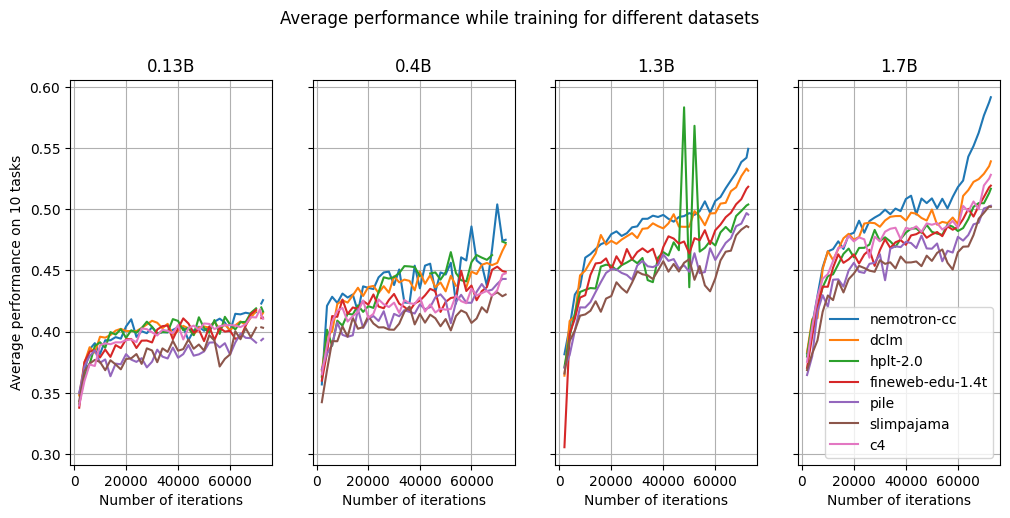

In [108]:
# compute average per iterationdf_sub.loc[:, ["size", "benchmark", "value"]] ".groupby("n_iter").mean()
sizes = [0.13, 0.4, 1.3, 1.7]
fig, axes = plt.subplots(1, len(sizes), figsize=(12, 5), sharey=True)

df_plot = df_all.copy()
df_plot.dataset = df_plot.dataset.apply(lambda s: s.replace('Nemotron-cc-2024-HQ-real-synth-mix', 'Nemotron-cc'))
df_plot.dataset = df_plot.dataset.str.lower()

for i, (ax, size) in enumerate(zip(axes, sizes)):        
    df_sub = df_plot.loc[(mask) & (df_plot.loc[:, "size"] == size)].copy()
    df_sub["tokens"] = df_plot["n_iter"] * df_plot["global_batch_size"]
    df_iter = df_sub.pivot_table(index=["dataset", "n_iter"], columns="benchmark", values="value").loc[:, bench_sel].mean(axis=1)

    df_iter_pivot = df_iter.reset_index().pivot_table(index="n_iter", columns="dataset", values=0)
    dataset_order = [
        "Nemotron-cc",
        "DCLM",
        "HPLT-2.0",
        "FineWeb-Edu-1.4T",
        "Pile",
        "SlimPajama",
        "C4",
        #"CommonCorpus",        
    ]
    dataset_order = [x.lower() for x in dataset_order]
    # fix order to have same colors across plots
    df_iter_pivot = df_iter_pivot.loc[:, [x for x in dataset_order if x in df_iter_pivot.columns]]    
    df_iter_pivot.plot(
        ax=ax,
    )
    ax.grid()
    ax.set_title(f"{size}B");
    ax.set_xlabel("Number of iterations");
    ax.set_ylabel(f"Average performance on {len(bench_sel)} tasks");        

    if i == len(axes) - 1:
        ax.legend(
            #loc="lower center",
            #loc="upper left",
            loc="lower right",
            ncols=1,
        )
    else:
        ax.get_legend().remove()
fig.suptitle("Average performance while training for different datasets", y=1.02);

In [147]:
config = {
    #"size": 1.7,
    #"tokenizer": "GPT-NeoX",
    #"global_bs": 1008,
    
    "n_tokens": "1T",    
    #"seq_length": 4096,
    #"lr_decay_style": "WSD",
    #"lr_warmup_iters": 25000,
}
mask_1T = None
for key, value in config.items():
    if mask_1T is None:
        mask_1T = (df_all.loc[:, key] == value)
    else:
        mask_1T &= (df_all.loc[:, key] == value)
df_all[mask_scaling].loc[:, hp_cols].groupby(hp_cols).count()

Empty DataFrame
Columns: []
Index: [(0.13, DCLM, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (0.13, DCLM, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.006, 25000.0), (0.4, DCLM, gpt-neox-20b, 300B, 1000.0, 4096.0, WSD, 0.004, 25000.0), (0.4, DCLM, gpt-neox-20b, 300B, 1000.0, 4096.0, WSD, 0.006, 25000.0), (1.3, DCLM, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (1.7, DCLM, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0)]

In [119]:
df_all[df_all.n_tokens == "1T"].loc[:, hp_cols].groupby(hp_cols).count()

Empty DataFrame
Columns: []
Index: [(1.7, DCLM, gpt-neox-20b, 1T, 1008.0, 4096.0, WSD, 0.004, 25000.0), (1.7, FineWeb-Edu-1.4T, gpt-neox-20b, 1T, 1008.0, 4096.0, WSD, 0.004, 25000.0), (1.7, Nemotron-cc-2024-HQ-real-synth-mix, gpt-neox-20b, 1T, 252.0, 16384.0, WSD, 0.004, 25000.0), (1.7, Nemotron-cc-2024-HQ-real-synth-mix, gpt-neox-20b, 1T, 504.0, 8192.0, WSD, 0.004, 25000.0), (1.7, Nemotron-cc-2024-HQ-real-synth-mix, gpt-neox-20b, 1T, 1008.0, 4096.0, WSD, 0.004, 25000.0)]

In [149]:
pd.options.display.float_format = "{:,.2f}".format

df_sub = df_plot.loc[ (df_plot.seq_length == 4096) & (df_plot.loc[:, "size"] == 1.7)].copy()
df_sub.pivot_table(index='benchmark', columns=["dataset", "n_tokens"], values="value", aggfunc="max").loc[bench_sel, ["dclm", "fineweb-edu-1.4t", "nemotron-cc"]]

dataset        dclm      fineweb-edu-1.4t      nemotron-cc     
n_tokens         1T 300B               1T 300B          1T 300B
benchmark                                                      
mmlu           0.27 0.27             0.28 0.28        0.48 0.40
copa           0.83 0.81             0.82 0.77        0.84 0.83
lambada_openai 0.68 0.65             0.55 0.52        0.60 0.56
openbookqa     0.40 0.40             0.43 0.42        0.44 0.43
winogrande     0.64 0.62             0.63 0.61        0.65 0.63
arc_challenge  0.44 0.40             0.47 0.44        0.51 0.48
boolq          0.69 0.69             0.69 0.67        0.76 0.75
commonsense_qa 0.21 0.23             0.22 0.21        0.58 0.46
hellaswag      0.70 0.67             0.66 0.63        0.72 0.69
piqa           0.77 0.76             0.76 0.76        0.79 0.79

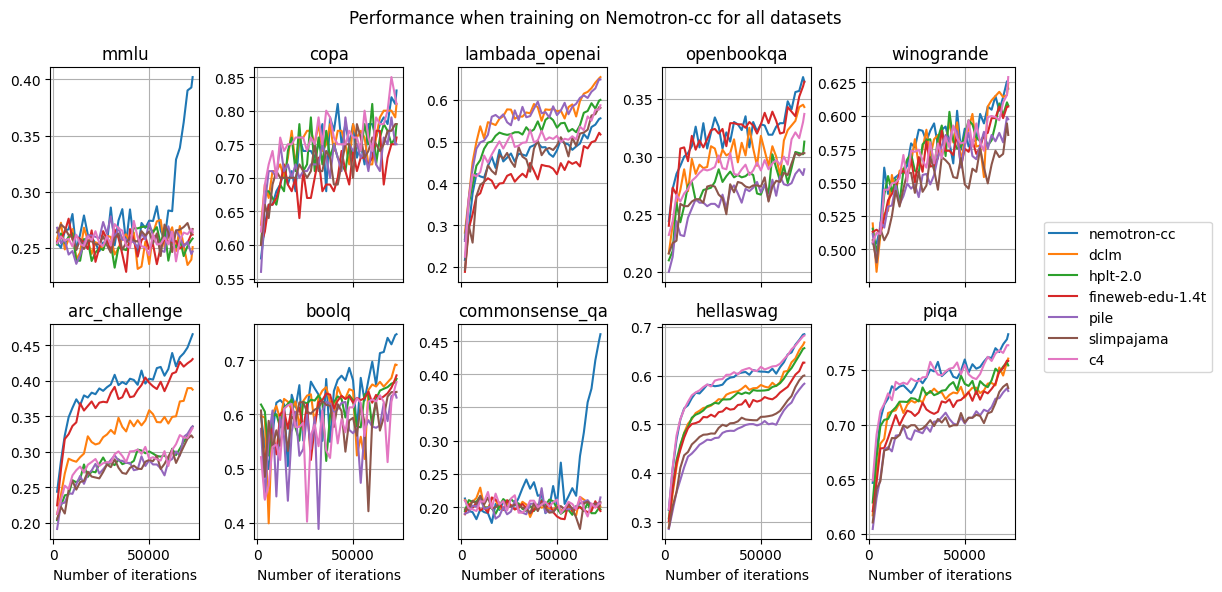

In [148]:
import numpy as np
fig, axes = plt.subplots(2, 5, figsize=(12, 6), sharex=True, sharey=False)

axes = np.ravel(axes)
lines = []  # Store line objects for legend
labels = []  # Store labels for legend
df_plot = df_all.copy()
df_plot.dataset = df_plot.dataset.apply(lambda s: s.replace('Nemotron-cc-2024-HQ-real-synth-mix', 'Nemotron-cc'))
df_plot.dataset = df_plot.dataset.apply(lambda s: s.replace('Nemotron-cc-2024-HQ-real-synth-mix', 'Nemotron-cc'))
df_plot.dataset = df_plot.dataset.str.lower()

for i, benchmark in enumerate(bench_sel):
    ax = axes[i]
    # Create an explicit copy of the filtered DataFrame
    df_sub = df_plot.loc[(mask) & (df_plot.loc[:, "size"] == size) & (df_plot.benchmark == benchmark)].copy()
    # Now modify the copy
    df_sub["tokens"] = df_sub["n_iter"] * df_sub["global_batch_size"]
    
    df_iter = df_sub.pivot_table(index=["dataset", "n_iter"], columns="benchmark", values="value").loc[:, benchmark]
    df_iter = df_iter.reset_index().pivot_table(index="n_iter", columns="dataset", values=benchmark).loc[:, dataset_order]
    # Capture the line objects and data column names
    plot_result = df_iter.plot(ax=ax, legend=False)
    
    # Store the lines and labels from the first plot
    if i == 0:
        lines = plot_result.get_lines()
        labels = df_iter.columns.tolist()
    
    ax.grid()
    ax.set_title(f"{benchmark}")
    ax.set_xlabel("Number of iterations")

# Create a single legend outside the plot
fig.legend(lines, labels, loc='center right', bbox_to_anchor=(1.02, 0.5))

# Adjust layout to make room for the legend
fig.suptitle("Performance when training on Nemotron-cc for all datasets")
plt.tight_layout()
plt.subplots_adjust(right=0.85)

## Plot for different scales

In [133]:
df_all.loc[df_all.dataset == "DCLM", hp_cols].groupby(hp_cols).count()

Empty DataFrame
Columns: []
Index: [(0.13, DCLM, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (0.13, DCLM, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.006, 25000.0), (0.4, DCLM, gpt-neox-20b, 300B, 1000.0, 4096.0, WSD, 0.004, 25000.0), (0.4, DCLM, gpt-neox-20b, 300B, 1000.0, 4096.0, WSD, 0.006, 25000.0), (1.3, DCLM, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (1.7, DCLM, gpt-neox-20b, 1T, 1008.0, 4096.0, WSD, 0.004, 25000.0), (1.7, DCLM, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0)]

In [134]:
config = {    
    "dataset": "DCLM",
    #"tokenizer": "GPT-NeoX",
    #"lr": .004,
    "n_tokens": "300B",
}
mask_scaling = None
for key, value in config.items():
    if mask_scaling is None:
        mask_scaling = (df_all.loc[:, key] == value)
    else:
        mask_scaling &= (df_all.loc[:, key] == value)
df_all[mask_scaling].loc[:, hp_cols].groupby(hp_cols).count()

Empty DataFrame
Columns: []
Index: [(0.13, DCLM, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (0.13, DCLM, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.006, 25000.0), (0.4, DCLM, gpt-neox-20b, 300B, 1000.0, 4096.0, WSD, 0.004, 25000.0), (0.4, DCLM, gpt-neox-20b, 300B, 1000.0, 4096.0, WSD, 0.006, 25000.0), (1.3, DCLM, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0), (1.7, DCLM, gpt-neox-20b, 300B, 1008.0, 4096.0, WSD, 0.004, 25000.0)]

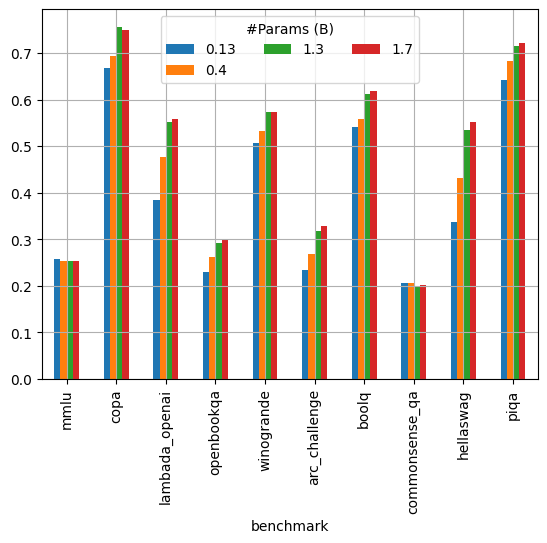

In [135]:
ax = df_all[mask_scaling].pivot_table(
    index="size", columns="benchmark", values="value"
).loc[:, bench_sel].T.plot(kind="bar")
ax.legend(title="#Params (B)", ncol=3)
ax.grid()
plt.xticks(rotation=90);

In [136]:
df_pivot = df_all.pivot_table(
    columns=["n_tokens", "model_name", "n_iter"], 
    index="benchmark",
    values="value",    
).loc[bench_sel]

# remove checkpoint which are missing one evaluation
df_pivot = df_pivot.dropna(axis=1)


In [137]:

# gets average performance for every model
df_avg = df_pivot.mean().reset_index()
avg_model = {}
for model_name in df_avg.model_name.unique():
    df_model = df_avg[df_avg.model_name == model_name].sort_values("n_iter")
    avg_model[model_name] = df_model[0].values[-1]
avg_model = {k: v for k,v in avg_model.items()}    

In [138]:
df_avg.n_tokens.value_counts()

n_tokens
300B    1646
1T       252
50B       12
Name: count, dtype: int64

In [139]:
len(set(avg_model.keys()))

68

In [140]:
df_avg_model = pd.DataFrame(index=avg_model.keys(), data={"perf": avg_model.values()})
df_hp = df_all.drop_duplicates("model_name").set_index("model_name").loc[avg_model.keys(), hp_cols]
df_avg_model = pd.concat([df_avg_model, df_hp], axis=1) 

In [141]:
n_tokens_mapping = {"300B": 300 * 1e9, "50B": 50 * 1e9, "1T": 1e12}
df_avg_model["FLOPS"] = 6 * df_avg_model["n_tokens"].apply(lambda x: n_tokens_mapping[x])  * df_avg_model["size"] * 1**9

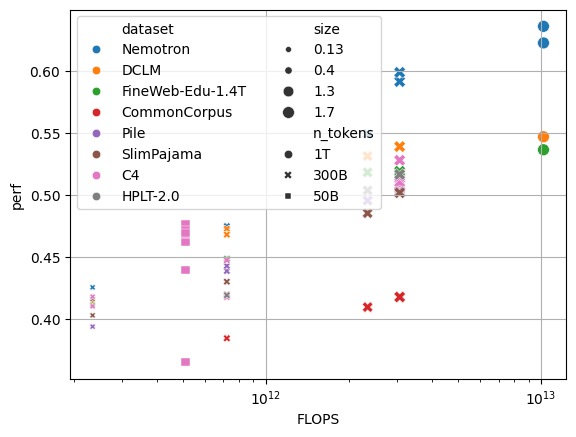

In [146]:
import seaborn as sns
df_avg_model.dataset = df_avg_model.dataset.apply(lambda s: s.replace('Nemotron-cc-2024-HQ-real-synth-mix', 'Nemotron'))

ax = sns.scatterplot(
    data=df_avg_model,
    x="FLOPS",
    y="perf",
    hue="dataset", 
    size="size",
    style="n_tokens",
)
ax.legend(ncols=2)
ax.set_xscale("log")

ax.grid()

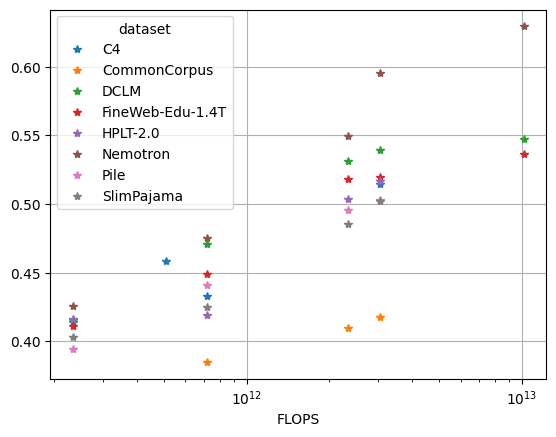

In [143]:
ax = df_avg_model.pivot_table(
    index="FLOPS",
    values="perf",
    columns="dataset",    
).plot(marker="*", linestyle="")
ax.set_xscale("log")
ax.grid()

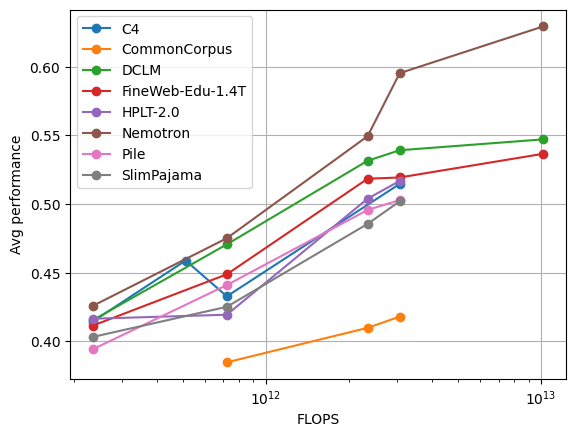

In [144]:
dd = df_avg_model.pivot_table(
    index="FLOPS",
    values="perf",
    columns="dataset",    
)
ax = None
for col in dd.columns:
    ax = dd.loc[:, col].dropna().plot(ax=ax, label=col, marker="o")
ax.set_xscale("log")
ax.set_ylabel("Avg performance")
ax.grid()
ax.legend()

In [54]:
# TODO store data of baselines